In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd

#Read the uploaded csv file
df = pd.read_csv('train.csv')

#Basic Information
print("Dataset shape: ", df.shape)
print("Column names: ", df.columns.tolist())
df.head()



Dataset shape:  (891, 12)
Column names:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#summary of data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#statistical summary for numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Count of missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# dropping Cabin (too many missing values) and Ticket (not useful for our analysis)
df = df.drop(columns=['Cabin', 'Ticket'])

KeyError: "['Cabin', 'Ticket'] not found in axis"

In [ ]:
# Filling missing Age with Median
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-21-2094938836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
# Fill missing Embarked with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Encode 'Sex' as binary (0: male, 1: female)
df['sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [ ]:
# confirm no missing values remain
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
sex,0


In [ ]:
# Create FamilySize = SibSp + Parch + 1 (1 is the passenger themself)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone = 1 if FamilySize == 1, else 0
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set style
sns.set_style('whitegrid')

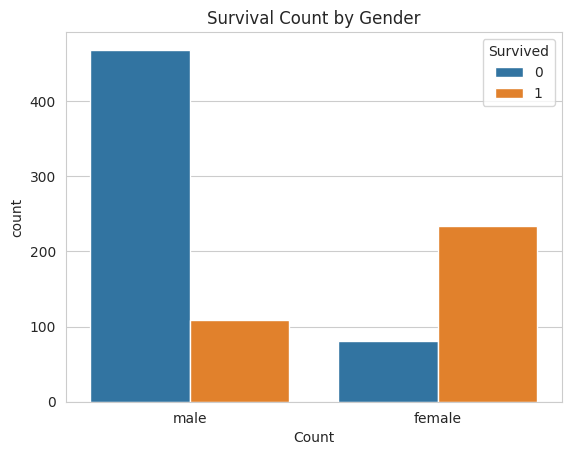

In [ ]:
#survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.xlabel('Count')
plt.show()

Female passengers had a significantly higher survival rate than males. This suggests that during evacuation, women were prioritized, possibly due to social norms like "women and children first."

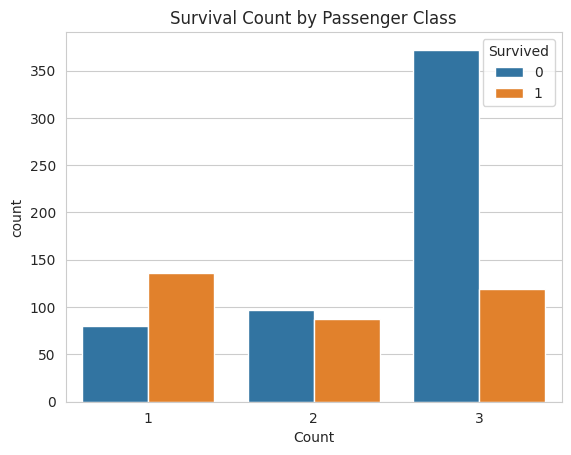

In [ ]:
# survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.xlabel('Count')
plt.show()

Passengers from first class (Pclass = 1) had the highest survival rates, while those from third class had the lowest. This indicates that socioeconomic status and cabin location may have impacted access to lifeboats and early evacuation.

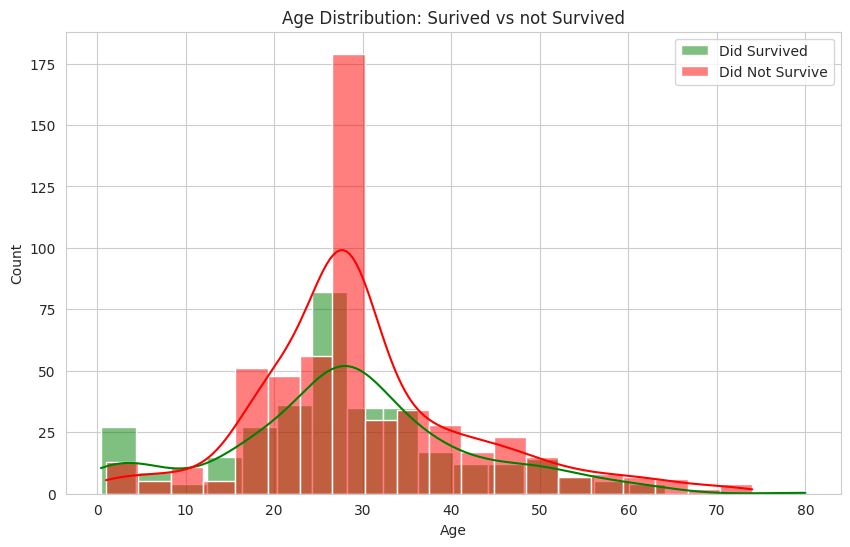

In [ ]:
# Survival by Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived']==1]["Age"], bins=20, kde=True, color='green', label='Did Survived')
sns.histplot(df[df['Survived']==0]["Age"], bins=20, kde=True, color='red', label='Did Not Survive')
plt.title('Age Distribution: Surived vs not Survived')
plt.legend()
plt.show()

Children, particularly those under age 10, had higher chances of survival. Passengers between ages 20-35 made up the largest group but had a lower survival rate. This highlights possible prioritization of children during rescue efforts.

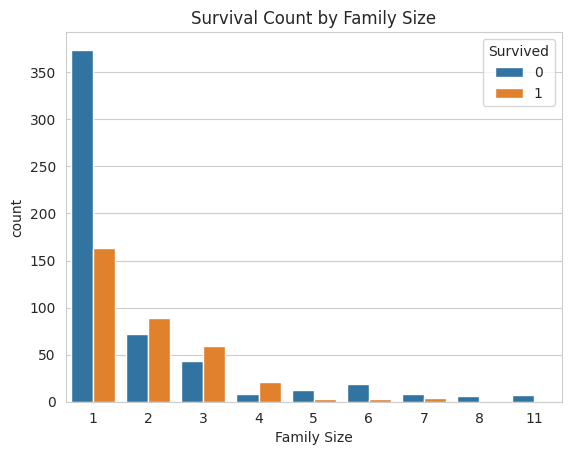

In [ ]:
# survival by family size

sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.show()

Passengers traveling alone (FamilySize = 1) had the lowest survival rate. Survival improved for small family groups (2-3 members), but declined again for larger families (≥5). Being with a small group may have helped in coordinating evacuation.